# imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# Rent  Regression

# read data

In [3]:

data = pd.read_csv("/content/drive/MyDrive/Tasks/deep-learning/task-01/Rent.csv")
data.head()


,BHK,Size,Floor,Area Locality,City,Bathroom,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,Rent
0,2,1100.000000,454,220,4,2,0,0,1,0,0,1,0,1,0,0,0,1,10000
1,2,967.936049,14,1525,4,1,0,0,1,0,1,0,0,1,0,0,0,1,20000
2,2,1000.000000,14,1758,4,1,0,0,1,0,1,0,0,1,0,0,0,1,17000
3,2,967.936049,10,525,4,1,0,0,1,0,0,1,0,1,0,0,0,1,10000
4,2,850.000000,10,1888,4,1,0,1,0,0,0,1,1,0,0,0,0,1,7500


# deviding data

In [4]:

X = data.drop("Rent", axis=1)
y = data["Rent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [5]:
#scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# model

In [8]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#training
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 931448896.0000 - mae: 15141.9834 - val_loss: 1068953024.0000 - val_mae: 16112.7803
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1199297152.0000 - mae: 15620.3867 - val_loss: 1068416512.0000 - val_mae: 16140.2520
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1257724800.0000 - mae: 15451.7588 - val_loss: 1067748928.0000 - val_mae: 16122.3555
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1301896448.0000 - mae: 15582.8643 - val_loss: 1067210112.0000 - val_mae: 16110.4902
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1410681088.0000 - mae: 16068.2012 - val_loss: 1066825408.0000 - val_mae: 16114.2207
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2324102400.0000 - mae: 17917.1094 - val_loss: 1066384896.0000 - val_mae: 16103.6738
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2033798912.0000 - mae: 16752.7871 - val_loss: 1066033408.0000 - val_mae: 16086.9854


In [9]:
#validation
loss, mae = model.evaluate(X_test, y_test)
print(f"(MAE): {mae:.2f}")
print(f"(MSE): {loss:.2f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4191611392.0000 - mae: 34805.7656
(MAE): 33486.33
(MSE): 4011897856.00


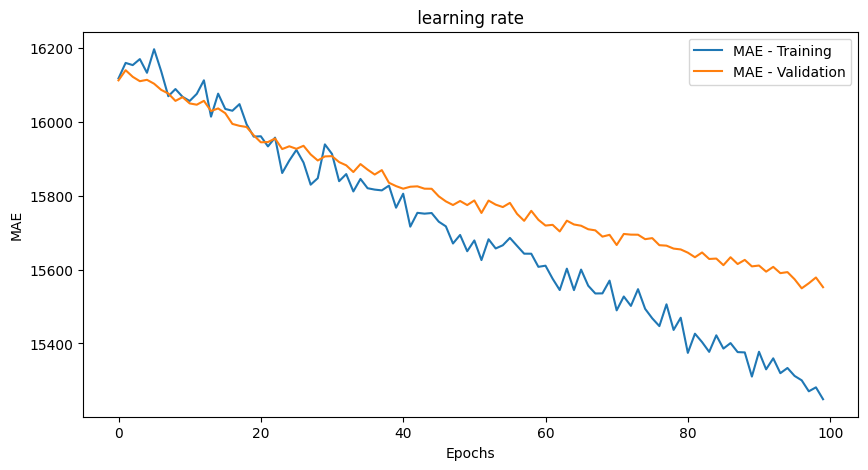

In [10]:
#laerning rate visulization
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='MAE - Training')
plt.plot(history.history['val_mae'], label='MAE - Validation')
plt.title(' learning rate ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [11]:
#teating in real data
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
results.head(10)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Actual,Predicted
3965,12000,0.534672
2917,32000,0.775892
1741,15000,0.221818
2978,29000,0.808319
1498,8000,0.270707
949,40000,0.550354
1321,34999,0.253449
3936,45000,1.046839
1162,150000,0.729489
4638,15000,0.579293


from matplotlib import pyplot as plt
_df_0['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

# stroke Classification

read data

In [12]:

data = pd.read_csv("/content/drive/MyDrive/Tasks/deep-learning/task-01/stroke.csv")
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333,1
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667,1
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667,1
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000,1
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667,1


# preprocessing

In [15]:
# missed data
data = data.dropna()

# laboling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# deviding
X = data.drop("stroke", axis=1)
y = data["stroke"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# sigmoid model

In [16]:
model_sigmoid = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_sigmoid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model_sigmoid.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#traning
history_sigmoid = model_sigmoid.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7253 - loss: 0.5570 - val_accuracy: 0.8001 - val_loss: 0.4441
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8034 - loss: 0.4289 - val_accuracy: 0.8033 - val_loss: 0.4205
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8169 - loss: 0.4028 - val_accuracy: 0.8066 - val_loss: 0.4146
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8072 - loss: 0.4062 - val_accuracy: 0.8168 - val_loss: 0.3941
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8217 - loss: 0.3853 - val_accuracy: 0.8233 - val_loss: 0.3817
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8301 - loss: 0.3749 - val_accuracy: 0.8220 - val_loss: 0.3778
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8305 - loss: 0.3666 - val_accuracy: 0.8380 - val_loss: 0.3646
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8393 - loss: 0.3571 - val_acc

In [18]:
# validation
loss, acc = model_sigmoid.evaluate(X_test, y_test)
print(f"   sigmoid model accuricy: {acc*100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9296 - loss: 0.2372
   sigmoid model accuricy: 93.06%


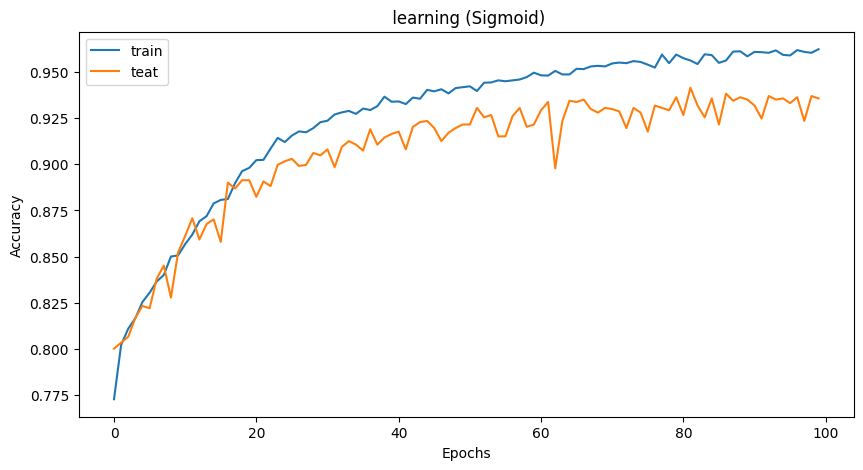

In [19]:
# learning rate vis
plt.figure(figsize=(10,5))
plt.plot(history_sigmoid.history['accuracy'], label='train')
plt.plot(history_sigmoid.history['val_accuracy'], label='teat')
plt.title(' learning (Sigmoid)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Softmax

In [20]:
# perocess data

y_multi = y.copy()
y_multi = y_multi.replace({0:0, 1:2})  # 0 = No Stroke, 2 = Stroke

np.random.seed(42)
y_multi.loc[y_multi.sample(frac=0.2).index] = 1

num_classes = len(np.unique(y_multi))
print("clacess", num_classes)


clacess 3


In [21]:
# model
model_softmax = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_softmax.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_softmax.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#training
history_softmax = model_softmax.fit(
    X_train, y_multi,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5838 - loss: 0.9713 - val_accuracy: 0.0000e+00 - val_loss: 1.6996
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6217 - loss: 0.9274 - val_accuracy: 0.0000e+00 - val_loss: 1.7300
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6181 - loss: 0.9228 - val_accuracy: 0.0000e+00 - val_loss: 1.6993
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6261 - loss: 0.9129 - val_accuracy: 0.0000e+00 - val_loss: 1.6928
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6249 - loss: 0.9143 - val_accuracy: 0.0000e+00 - val_loss: 1.6652
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6278 - loss: 0.9124 - val_accuracy: 0.0000e+00 - val_loss: 1.7712
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6307 - loss: 0.9050 - val_accuracy: 0.0000e+00 - val_loss: 1.7068
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.62

In [24]:
# validtion
loss, acc = model_softmax.evaluate(X_test, y_multi.loc[y_test.index])
print(f"ACCURICY Softmax: {acc*100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0636 - loss: 1.6606
ACCURICY Softmax: 6.07%


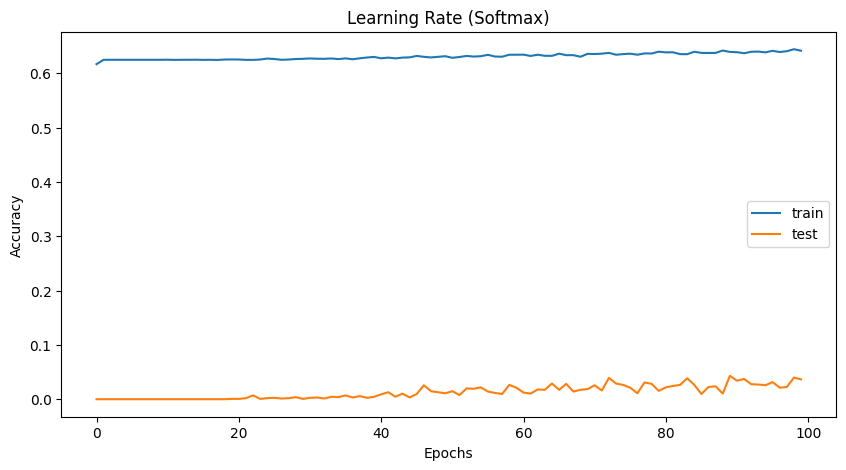

In [26]:
# learning rate vis (Softmax)
plt.figure(figsize=(10,5))
plt.plot(history_softmax.history['accuracy'], label='train')
plt.plot(history_softmax.history['val_accuracy'], label='test')
plt.title('Learning Rate (Softmax)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()